In [41]:
from rdkit import Chem

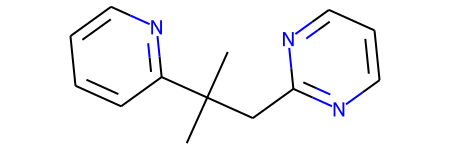

In [243]:
mol = Chem.MolFromSmiles("CC(Cc1ncccn1)(c2ncccc2)C")
mol

In [ ]:
ri = mol.GetRingInfo()
atom_rings = ri.AtomRings()
bond_rings = ri.BondRings()

In [ ]:
atom_rings

In [ ]:
systems

In [ ]:
systems = []
for ring in atom_rings:
    ringAts = set(ring)
    nSystems = []
    for system in systems:
        nInCommon = len(ringAts.intersection(system))
        if nInCommon:
            ringAts = ringAts.union(system)
        else:
            nSystems.append(system)
    nSystems.append(ringAts)
    systems = nSystems

In [ ]:
systems

In [ ]:
ring_sys_size = []
for ring_s in systems:
    ring_s = set(ring_s)
    size = 0
    for ring in atom_rings:
        for each_atom in ring:
            ring = set(ring)
            if ring_s.intersection(ring):
                size += 1
    ring_sys_size.append(size)

In [ ]:
ring_sys_size

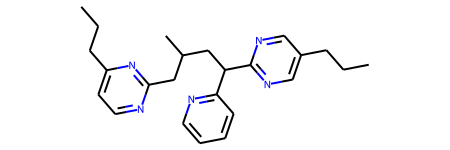

In [245]:
from rdkit.Chem.Scaffolds import MurckoScaffold
smi = 'C(c1ncc(CCC)cn1)(c2ncccc2)CC(C)C(c3nc(CCC)ccn3)'
mol_t = Chem.MolFromSmiles(smi)
mol_t

In [204]:
for i,atom in enumerate(mol_t.GetAtoms()):
    atom.SetAtomMapNum(i)

In [205]:
mol_t_list = [x.GetIdx() for x in mol_t.GetAtoms()]

In [206]:
mol_t_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22]

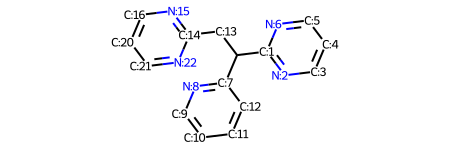

In [234]:
mol_s = MurckoScaffold.GetScaffoldForMol(mol_t)
mol_s

In [235]:
match = mol_t.GetSubstructMatches(mol_s)
scaffold_list = list(match[0])
scaffold_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22]

In [242]:
out_atom = []
for i in mol_t_list:
    if i not in scaffold_list:
        out_atom.append(i)

out_list_group = []
current_list = []
for i, each in enumerate(out_atom):    

    if i<len(out_atom)-1 and out_atom[i+1]-out_atom[i]==1:
        current_list.append(out_atom[i])
        
    else:
        current_list.append(out_atom[i])
        out_list_group.append(current_list)
        current_list = []

side_chain_max_num = max([len(each_site) for each_site in out_list_group])
side_chain_max_num

3